In [1]:
import numpy as np
import pandas as pd

In [2]:
sm = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')


In [3]:
sm.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sm.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
sm.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1064,ham,"That's fine, I'll bitch at you about it later ...",NaN,NaN,NaN
3175,ham,Havent still waitin as usual... ÌÏ come back s...,NaN,NaN,NaN
851,ham,"I am real, baby! I want to bring out your inne...",NaN,NaN,NaN
4718,ham,Aiyo... Her lesson so early... I'm still sleep...,NaN,NaN,NaN


In [6]:
sm.shape

(5572, 5)

stages we are gonna perform
1. data cleaning
2.  eda
3.  text preprocessing
4.  model building
5.  evaluation
6.  improvemnet
7.  website
8.  deploy
    

1.DATA  CLEANING

In [7]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# in the above we see that least no.of the values are missing in the last 3 columns
# so basically drop them


In [9]:
sm.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
sm.sample(5)

,v1,v2
4246,spam,Text PASS to 69669 to collect your polyphonic ...
4971,ham,I'm fine. Hope you are good. Do take care.
4813,ham,Ummmmmaah Many many happy returns of d day my ...
2676,ham,* Am on a train back from northampton so i'm a...
2738,ham,I sent you the prices and do you mean the &lt...


In [11]:
#renaming the columns

In [12]:
sm.rename(columns={'v1':'target','v2':'text'},inplace =True)
sm.sample(5)

,target,text
665,ham,En chikku nange bakra msg kalstiya..then had t...
4335,ham,"Fyi I'm taking a quick shower, be at epsilon i..."
3733,ham,"4 tacos + 1 rajas burrito, right?"
3953,ham,I probably won't eat at all today. I think I'm...
279,ham,All done? All handed in? Celebrations in full ...


In [13]:
# target value must be always 0 or 1
# so just change it using labelencoder

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
sm['target'] = encoder.fit_transform(sm['target'])

In [16]:
sm.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# check if any missing values present or not

In [18]:
sm.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#no missing values presnt

In [20]:
#check for dupliczate values

In [21]:
sm.duplicated().sum()

403

In [22]:
#there are 403 duplicated values

In [23]:
sm = sm.drop_duplicates(keep='first')

In [24]:
sm.duplicated().sum()

0

In [25]:
sm.shape

(5169, 2)

In [26]:
# see no.of rows decrease from 5572 to 5169 after removing the duplicates

2.EDA(Exploratry Data Analysis)

In [27]:
sm['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [28]:
#no.of ham is 4516 and spam is 653

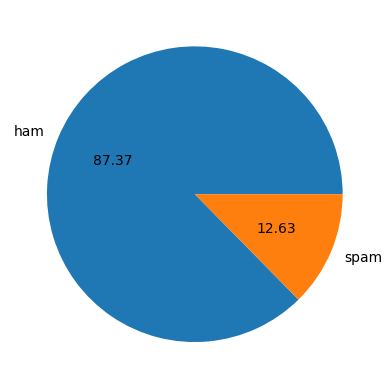

In [29]:
import matplotlib.pyplot as plt
plt.pie(sm['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
# here we can see that ham % is more than spam % that means it is an unbalanced data

In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
#we will check no.of character 
# no.of words'
#no.of line


In [34]:
#num of character

In [35]:
sm['num_character']=sm['text'].apply(len)

In [36]:
sm.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
#no.of words

In [38]:
sm['num_words']=sm['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
sm.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
#no.of sentences

In [41]:
sm['num_sentences']=sm['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
sm.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
sm[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
#separately count for ham

In [45]:
sm[sm['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
#separately count for spam

In [47]:
sm[sm['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [48]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

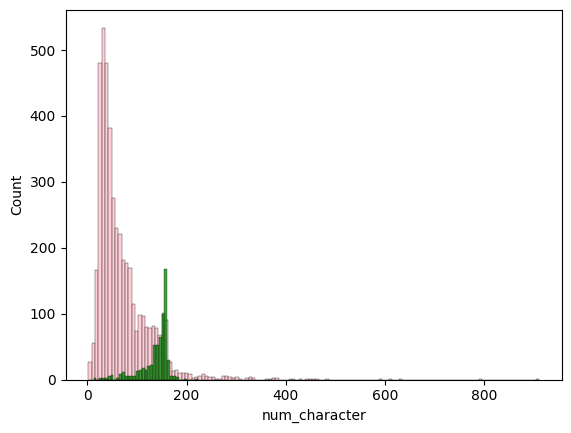

In [49]:
sns.histplot(sm[sm['target']==0]['num_character'],color='pink')
sns.histplot(sm[sm['target']==1]['num_character'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

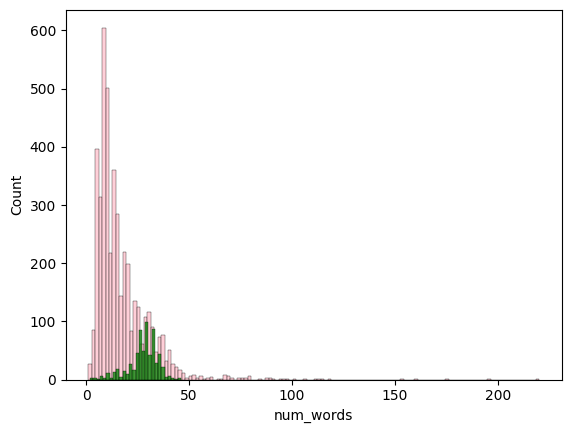

In [50]:
sns.histplot(sm[sm['target']==0]['num_words'],color='pink')
sns.histplot(sm[sm['target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

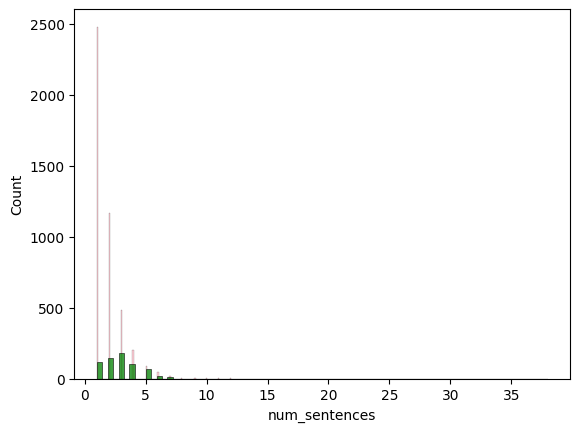

In [51]:
sns.histplot(sm[sm['target']==0]['num_sentences'],color='pink')
sns.histplot(sm[sm['target']==1]['num_sentences'],color='green')

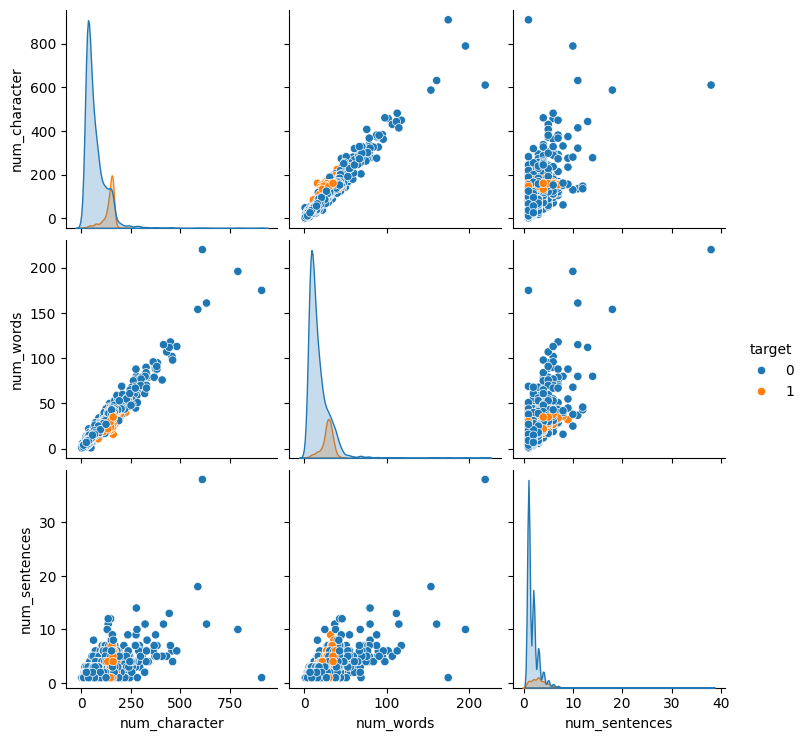

In [52]:
sns.pairplot(sm,hue ='target')

In [53]:
sm[sm['target']==1][['num_character','num_words','num_sentences']].corr()

,num_character,num_words,num_sentences
num_character,1.000000,0.856008,0.320164
num_words,0.856008,1.000000,0.455011
num_sentences,0.320164,0.455011,1.000000


In [54]:
sm[sm['target']==0][['num_character','num_words','num_sentences']].corr()

,num_character,num_words,num_sentences
num_character,1.000000,0.975485,0.620504
num_words,0.975485,1.000000,0.685774
num_sentences,0.620504,0.685774,1.000000


<Axes: >

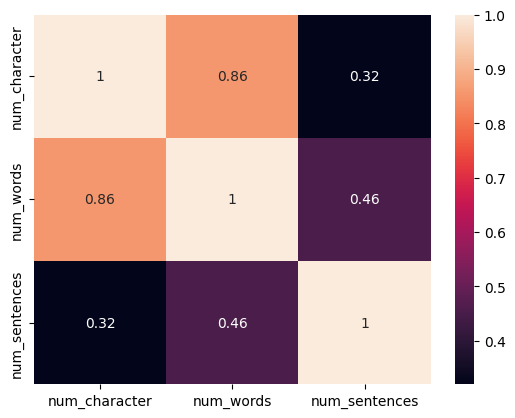

In [55]:
sns.heatmap(sm[sm['target']==1][['num_character','num_words','num_sentences']].corr(),annot=True)#annot =true shows the values inside the boxes

3. DATA PREPROCESSING
    1. Lowercase
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctuation
    5. Stemming
   

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [59]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum:
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    
            
    return " ".join(y)

In [60]:
transform_text('hi myself sanjivani please keep loving me ')# here all other words except sanjivani and hi are stopwords

'hi sanjivani pleas keep love'

In [61]:
sm['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [63]:
sm['transformed_text']=sm['text'].apply(transform_text)# transformed text means the process of converting a sequence of text into another sequence of the
                                                         #same or different length

In [64]:
sm.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [65]:
!pip install wordcloud

In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=1500,min_font_size=10,background_color='white')


In [67]:
spam_wc = wc.generate(sm[sm['target']==1]['transformed_text'].str.cat(sep=" "))

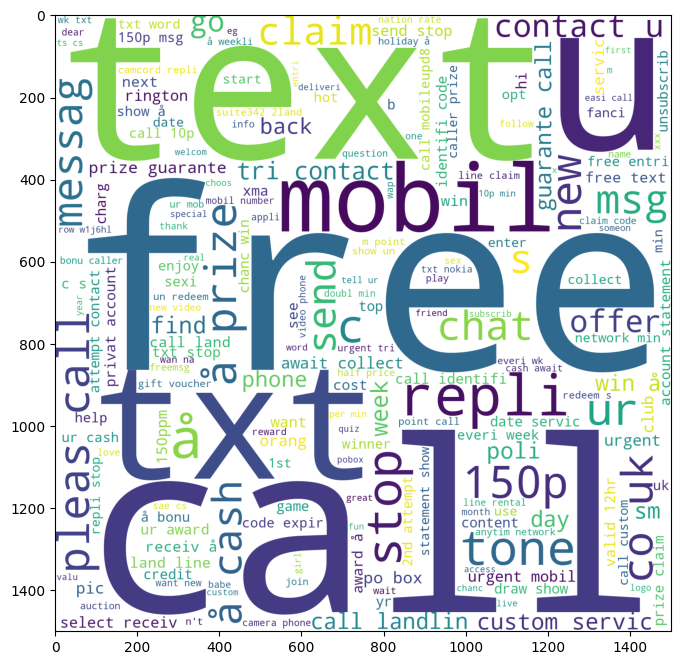

In [68]:
plt.figure(figsize=(15,8))#justifying size
plt.imshow(spam_wc)
# the below words are the most common word used in spam

In [69]:
spam_wc = wc.generate(sm[sm['target']==0]['transformed_text'].str.cat(sep=" "))

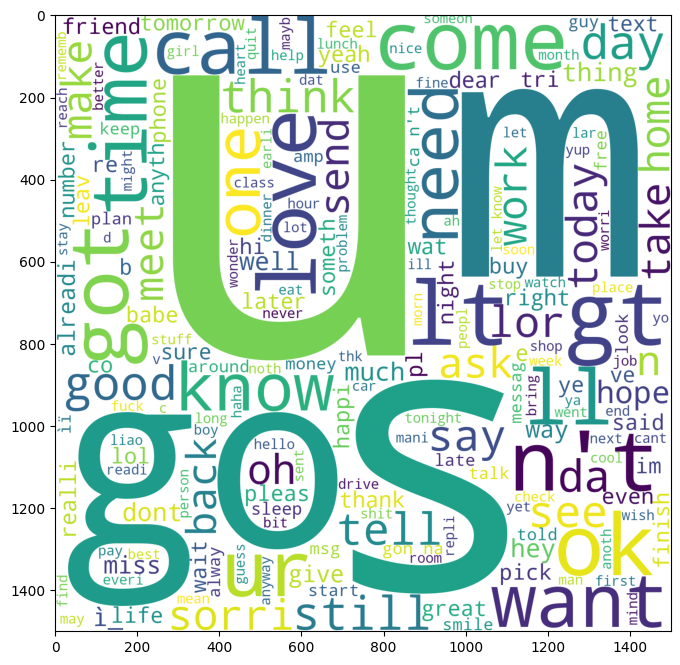

In [70]:
plt.figure(figsize=(15,8))#justifying size
plt.imshow(spam_wc)


In [71]:
#checking top 30 words for ham and spam

In [72]:
spam_corpous =[]
for msg in sm[sm['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpous.append(word)

In [73]:
spam_corpous#most spam words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 "'s",
 'appli',
 '08452810075over18',
 "'s",
 'freemsg',
 'hey',
 'darl',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20,000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day',
 '6day',
 '16+',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'w

In [74]:
len(spam_corpous)

11083

<Axes: ylabel='0'>

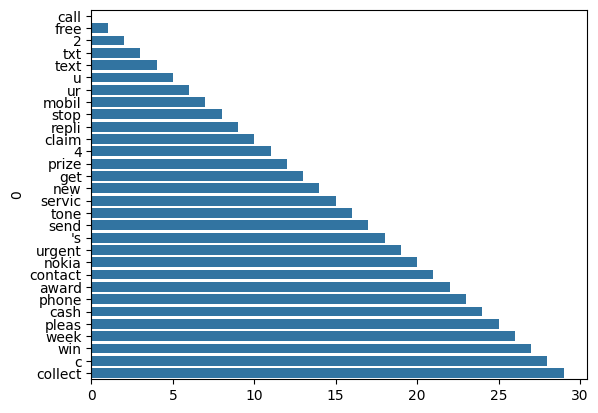

In [75]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpous).most_common(30))[0])


In [76]:
from collections import Counter
pd.DataFrame(Counter(spam_corpous).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18         's
19     urgent
20      nokia
21    contact
22      award
23      phone
24       cash
25      pleas
26       week
27        win
28          c
29    collect
Name: 0, dtype: object

In [77]:
ham_corpous =[]
for msg in sm[sm['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpous.append(word)

In [78]:
ham_corpous#most spam words

['go',
 'jurong',
 'point',
 'crazi',
 '..',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amor',
 'wat',
 '...',
 'ok',
 'lar',
 '...',
 'joke',
 'wif',
 'u',
 'oni',
 '...',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 '...',
 'u',
 'c',
 'alreadi',
 'say',
 '...',
 'nah',
 "n't",
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 "'mell",
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 "'m",
 'gon',
 'na',
 'home',
 'soon',
 "n't",
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 "'ve",
 'cri',
 'enough',
 'today',
 "'ve",
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 '...',
 "'m",
 'watch',
 '

<Axes: ylabel='1'>

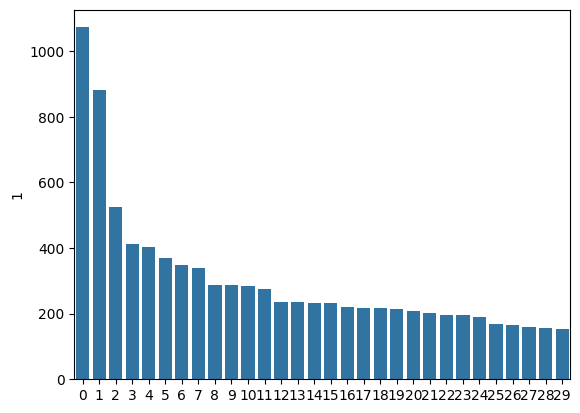

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpous).most_common(30))[1])


4. MODEL BULIDING
   

In [80]:
sm.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [81]:
#here we can convert transformed_text to numeric form

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [83]:
x = cv.fit_transform(sm['transformed_text']).toarray()

In [84]:
x.shape

(5169, 7377)

In [85]:
y = sm['target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [90]:
#gaussiannb ... are the algorithms that we are gonna perform here

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.8907156673114119
[[796 100]
 [ 13 125]]
0.5555555555555556


In [93]:
#here in gnb the precision score is very low

In [94]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))



0.9738878143133463
[[880  16]
 [ 11 127]]
0.8881118881118881


In [95]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))



0.97678916827853
[[893   3]
 [ 21 117]]
0.975


In [96]:
#bnb is performing well

In [97]:
# previously for model buliding we are using countvectorizer method , now check with tfidfvectorizer

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf =TfidfVectorizer()


In [99]:
x = tf.fit_transform(sm['transformed_text']).toarray()

In [100]:
x.shape

(5169, 7377)

In [101]:
y = sm['target'].values


In [102]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.8849129593810445
[[796 100]
 [ 19 119]]
0.54337899543379


In [108]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))




0.9622823984526112
[[896   0]
 [ 39  99]]
1.0


In [109]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))



0.97678916827853
[[893   3]
 [ 21 117]]
0.975


In [110]:
# so we can see that in tfidfvectorizer the precison score is more in mnb than countervectorizer

In [111]:
!pip install xgboost

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [113]:
svc =SVC(kernel ='sigmoid', gamma=1.0)
knc =KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc =   BaggingClassifier(n_estimators=50,random_state=2)
etc =  ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [114]:
from sklearn.metrics import accuracy_score, precision_score


In [115]:
clfs ={
    'SVC' : svc,
    'KN' :knc,
    'NB' : mnb,
    'DT' :dtc,
    
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT' : gbdt,
    'xgb':xgb,
    'LR': lrc
}

In [116]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [117]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)

For SVC
Accuracy 0.971953578336557
Precision 0.9739130434782609
For KN
Accuracy 0.8965183752417795
Precision 1.0
For NB
Accuracy 0.9622823984526112
Precision 1.0
For DT
Accuracy 0.9342359767891683
Precision 0.85
For RF
Accuracy 0.9729206963249516
Precision 0.9824561403508771
For AdaBoost
Accuracy 0.9709864603481625
Precision 0.9655172413793104
For BgC
Accuracy 0.9622823984526112
Precision 0.8721804511278195
For ETC
Accuracy 0.9796905222437138
Precision 0.9834710743801653
For GBDT
Accuracy 0.9506769825918762
Precision 0.9578947368421052
For xgb
Accuracy 0.9758220502901354
Precision 0.9448818897637795
For LR
Accuracy 0.9477756286266924
Precision 0.9883720930232558


In [136]:

# Convert dict_keys to list
algorithms = list(clfs.keys())

# Check lengths of all lists
len_algorithms = len(algorithms)
len_accuracy = len(accuracy_scores)
len_precision = len(precision_scores)

print(f'Length of algorithms: {len_algorithms}')
print(f'Length of accuracy_scores: {len_accuracy}')
print(f'Length of precision_scores: {len_precision}')

# Find the minimum length to truncate all lists to the same length
min_length = min(len_algorithms, len_accuracy, len_precision)

# Truncate all lists to the minimum length
algorithms = algorithms[:min_length]
accuracy_scores = accuracy_scores[:min_length]
precision_scores = precision_scores[:min_length]

# Create the DataFrame
performance_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Sort the DataFrame by 'Precision' in descending order
performance_df = performance_df.sort_values('Precision', ascending=False)

# Display the DataFrame
print(performance_df)


Length of algorithms: 11
Length of accuracy_scores: 11
Length of precision_scores: 11
   Algorithm  Accuracy  Precision
1         KN  0.896518   1.000000
2         NB  0.962282   1.000000
10        LR  0.947776   0.988372
7        ETC  0.979691   0.983471
4         RF  0.972921   0.982456
0        SVC  0.971954   0.973913
5   AdaBoost  0.970986   0.965517
8       GBDT  0.950677   0.957895
9        xgb  0.975822   0.944882
6        BgC  0.962282   0.872180
3         DT  0.937137   0.868687


In [134]:
performance_sm1=pd.melt(performance_df,id_vars='Algorithm')

In [135]:
performance_sm1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,NB,Accuracy,0.962282
2,LR,Accuracy,0.947776
3,ETC,Accuracy,0.979691
4,RF,Accuracy,0.972921
5,SVC,Accuracy,0.971954
6,AdaBoost,Accuracy,0.970986
7,GBDT,Accuracy,0.950677
8,xgb,Accuracy,0.975822
9,BgC,Accuracy,0.962282


In [126]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.947776,0.988372


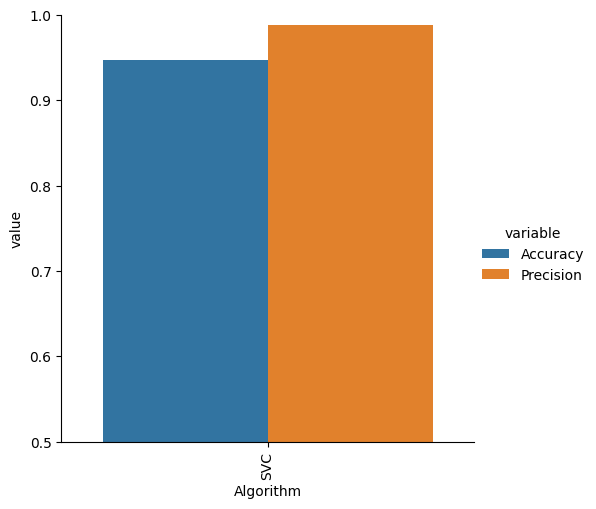

In [128]:


# Assuming performance_df is already created and sorted

# Reshape the DataFrame using pd.melt
melted_df = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'Precision'])

# Create the catplot
sns.catplot(x='Algorithm', y='value', hue='variable', data=melted_df, kind='bar', height=5)

# Set y-axis limits
plt.ylim(0.5, 1.0)

# Rotate x-axis labels
plt.xticks(rotation='vertical')

# Show the plot
plt.show()
